In [73]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np

os.chdir("../src/")

from dataset_util import Dataset
from matplotlib import pyplot as plt
import sys

sys.path.append("/home/yanhuize/ml-utils")
from my_utils import reduce_mem_usage

ds = Dataset()

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
ds.train = pd.merge(ds.train, ds.label, on="sequence")

In [75]:
train = reduce_mem_usage(ds.train, verbose=False)

加上那些好用的特征，，

In [76]:
import scipy.stats


def f(x):
    return scipy.stats.kurtosis(x)


train_pivoted0 = train.pivot(
    index=["sequence", "subject"], columns="step", values=ds.sensor_cols
)

train_pivoted0["sensor_04_mean"] = train_pivoted0.sensor04.mean(axis=1)
train_pivoted0["sensor_02_std"] = train_pivoted0.sensor02.std(axis=1)
train_pivoted0["sensor_10_kurtosis"] = scipy.stats.kurtosis(
    train_pivoted0.sensor10, axis=1
)
train_pivoted0["sensor_04_kurtosis"] = scipy.stats.kurtosis(
    train_pivoted0.sensor04, axis=1
)

# train_pivoted0 = train_pivoted0.merge(ds.label, on="sequence")

In [77]:
train_pivoted0.sensor_04_kurtosis.reset_index().merge(ds.label, on="sequence")

,sequence,subject,sensor_04_kurtosis,state
0,0,47,-0.848722,0
1,1,66,3.536804,1
2,2,66,5.871299,1
3,3,542,-0.137156,1
4,4,437,-0.310099,1
...,...,...,...,...
25963,25963,558,0.413364,1
25964,25964,297,-1.000191,0
25965,25965,129,1.342628,1
25966,25966,170,0.719383,1


In [78]:
train_pivoted0.sensor_04_kurtosis.index.get_level_values(0)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            25958, 25959, 25960, 25961, 25962, 25963, 25964, 25965, 25966,
            25967],
           dtype='int64', name='sequence', length=25968)

In [79]:
def p(col):
    temp = (
        train_pivoted0[col]
        .reset_index()
        .merge(ds.label, on="sequence")
        .sort_values(col)
    ).reset_index()
    plt.scatter(x=temp.index, y=temp.state.rolling(1000).mean(), s=2)
    plt.show()

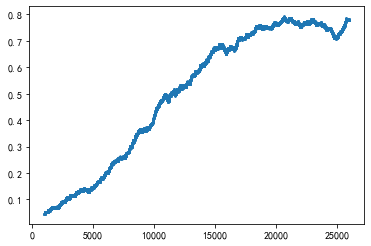

In [80]:
p("sensor_04_kurtosis")

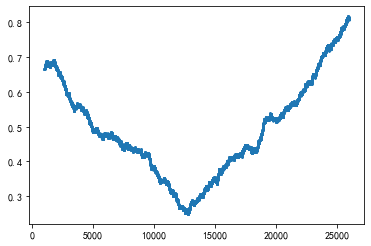

In [81]:
p("sensor_04_mean")

In [82]:
train

,sequence,subject,step,sensor00,sensor01,sensor02,sensor03,sensor04,sensor05,sensor06,sensor07,sensor08,sensor09,sensor10,sensor11,sensor12,state
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736146,0
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558075,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914748,0
1558076,25967,327,56,0.130603,0.349790,-1.666153,-0.324779,0.775324,-0.332835,0.099271,0.122137,-0.2,0.644509,0.691407,-0.613169,-0.515772,0
1558077,25967,327,57,-0.579598,0.429622,-1.666153,0.319469,0.308861,0.282723,-0.512750,0.012214,-1.6,-0.424133,0.716855,1.628601,0.928389,0
1558078,25967,327,58,1.278980,1.711134,-1.522820,0.802655,-0.460541,-0.055348,2.405282,0.043511,1.9,0.283960,-0.914914,0.364198,0.211424,0


In [83]:
train_pivoted0

sensor00                                                    \
step                     0         1         2         3         4         5   
sequence subject                                                               
0        47      -0.196291 -0.447450  0.326893  0.523184  0.272025 -1.073416   
1        66      -6.657650  1.633694  1.863215 -2.846213  0.593508  2.469861   
2        66      -1.741886  3.402627 -0.632148  0.208655 -0.800618 -2.274343   
3        542      0.264297 -1.808346  0.078825  1.037094 -0.189335 -1.302937   
4        437      0.567233 -0.823802  1.476816 -1.710201 -0.408810  0.556414   
...                    ...       ...       ...       ...       ...       ...   
25963    558     -1.441267  2.359351 -0.881762  1.299073 -0.862442 -1.428130   
25964    297      0.996909  0.415765  1.874034 -5.220247  2.927357 -0.311437   
25965    129     -0.097372 -0.860896  0.928903  0.750386  1.346986 -3.422720   
25966    170     -0.357032 -1.603555 -0.296754  0.273570  0.462133  0.244977   
25967    327     -0.313756  0.392581 -0.554096  0.070325 -0.258114  0.095054   

                                                          ...   sensor12  \
step                     6         7         8         9  ...         54   
sequence subject                                          ...              
0        47       0.350850 -0.304482 -0.216383  0.303709  ...  -3.615089   
1        66      -1.202473 -0.829212  1.091190 -0.334621  ...  -0.120205   
2        66       2.009274 -0.563369 -0.050232  0.800618  ...   0.332481   
3        542      1.078825  2.257342 -2.283617 -2.759660  ...   0.055840   
4        437      0.853168 -0.406491 -0.009274 -0.021638  ...  -0.098465   
...                    ...       ...       ...       ...  ...        ...   
25963    558      0.125193  2.119784  0.208655  1.847759  ...  -0.083973   
25964    297      0.496909  0.372488 -0.341577 -0.565688  ...  -4.326940   
25965    129      0.983771  2.818393 -1.460587 -1.988408  ...  -0.449275   
25966    170     -0.341577 -0.229521  0.877125 -1.197063  ... -12.375533   
25967    327      0.387172 -0.824575  0.471406 -0.037094  ...   0.639812   

                                                                        \
step                     55        56         57         58         59   
sequence subject                                                         
0        47        0.791134  5.887042  -7.211424 -26.738705 -50.658993   
1        66        0.056692  0.062234  -0.013640   0.098039  -0.115090   
2        66       -0.013214  0.245524  -0.091219  -0.306905   0.046036   
3        542      -0.022165  0.054135  -0.185422   0.311168  -0.166240   
4        437      -0.040068  0.135976   0.121910  -0.059676  -0.087809   
...                     ...       ...        ...        ...        ...   
25963    558       0.026002  0.036232  -0.042199   0.028986  -0.015772   
25964    297     -13.625319  9.957375 -13.389174 -17.123615   9.219522   
25965    129       0.271952 -0.262575   0.713129  -1.378517   1.802217   
25966    170       9.170076  6.789855 -15.287297 -10.659846  19.436914   
25967    327      -0.914748 -0.515772   0.928389   0.211424  -1.561381   

                 sensor_04_mean sensor_02_std sensor_10_kurtosis  \
step                                                               
sequence subject                                                   
0        47           -0.054774      0.138300          -0.513777   
1        66            0.147499      0.492015          19.969027   
2        66           -0.174372      0.170335           7.386538   
3        542          -0.018023      0.197465           3.894958   
4        437           0.004291      0.164884          -1.208660   
...                         ...           ...                ...   
25963    558          -0.013230      0.362207           2.096776   
25964    297          -0.021382      0.149632          -1.275091   
25965    129           0.029762      0.217040  